<a href="https://colab.research.google.com/github/Jaqueline-Silva3001/Controle-de-Processos/blob/main/Pr%C3%A1tica_5_M%C3%A9todos_de_aproxima%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -qq control

# Importar as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import control as ct

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 8.1 MB/s eta 0:00:00


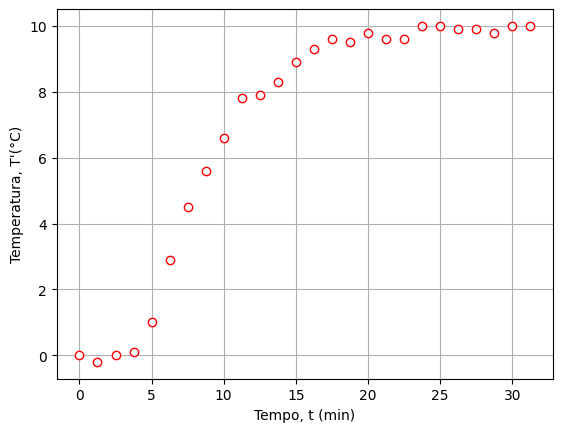

In [2]:
# IDENTIFICAÇÃO DE SISTEMAS

# Dados experimentais
t = np.array([ 0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.,
       11.25, 12.5 , 13.75, 15.  , 16.25, 17.5 , 18.75, 20.  , 21.25,
       22.5 , 23.75, 25.  , 26.25, 27.5 , 28.75, 30., 31.25  ])

T = np.array([ 0. , -0.2, -0. ,  0.1,  1. ,  2.9,  4.5,  5.6,  6.6,  7.8,  7.9,
        8.3,  8.9,  9.3,  9.6,  9.5,  9.8,  9.6,  9.6, 10. , 10. ,  9.9,
        9.9,  9.8, 10., 10. ])

# Visualização dos dados
plt.plot(t, T, marker='o', markerfacecolor='white', markeredgecolor='red',
         markeredgewidth=1, linestyle='None', color='red')
plt.xlabel('Tempo, t (min)')
plt.ylabel('Temperatura, T\'(°C)')
plt.grid()
plt.show()



Ganho do processo: 10.0
Atraso de tempo: 3.75
Constante de tempo: 6.050000000000001


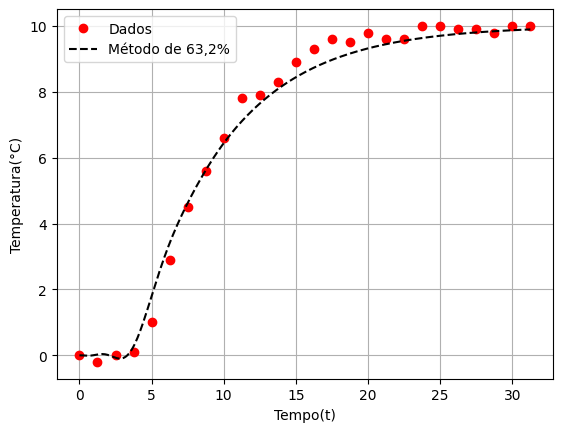

In [3]:
# MÉTODO DO TEMPO REQUERIDO PARA A SAÍDA ATINGIR 63,2% DA VARIAÇÃO TOTAL:

deltaU = 1
deltaY = T[-1]-T[0]
K = deltaY/deltaU
print('Ganho do processo:', K)

teta = 3.75
tau = 9.8 - teta
print('Atraso de tempo:', teta)
print('Constante de tempo:', tau)

s = ct.tf('s')
num, den = ct.pade(teta, 5, 3)
Gdelay = ct.tf(num, den)

# Função de transferência aproximada:
G1 = K/(tau*s+1)*Gdelay

t1, y1 = ct.step_response(G1, T = t[-1])
plt.plot(t, T, 'or', label ='Dados')
plt.plot(t1, y1, 'k--', label ='Método de 63,2%')
plt.grid()
plt.xlabel('Tempo(t)')
plt.ylabel('Temperatura(°C)')
plt.legend()
plt.show()



Atraso de tempo: 4.3900000000000015
Constante de tempo: 5.025


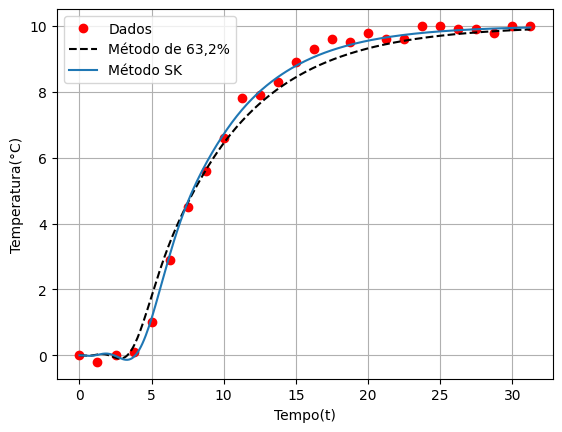

In [4]:
# MÉTODO DE SUNDARESAN E KRISHNASWAMY

t_1, t_2 = 6.5, 14.0
tau = 0.67*(t_2-t_1)
teta = 1.3*t_1 - 0.29*t_2

print('Atraso de tempo:', teta)
print('Constante de tempo:', tau)

s = ct.tf('s')
num, den = ct.pade(teta, 5, 3)
Gdelay = ct.tf(num, den)

# Função de transferência aproximada:
G2 = K/(tau*s+1)*Gdelay

t2, y2 = ct.step_response(G2, T = t[-1])
plt.plot(t, T, 'or', label ='Dados')
plt.plot(t1, y1, 'k--', label ='Método de 63,2%')
plt.plot(t2, y2, label ='Método SK')
plt.grid()
plt.xlabel('Tempo(t)')
plt.ylabel('Temperatura(°C)')
plt.legend()
plt.show()

2.25 5.949999999999999 0.3781512605042017
Atraso de tempo: 3.75
Constante de tempo: 2.833333333333333
Fator de amortecimento: 1.1


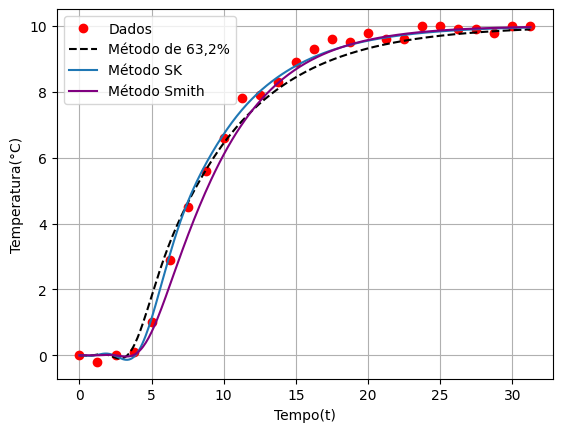

In [5]:
# MÉTODO DO SMITH

teta = 3.75
t20 = 6.0 - teta
t60 = 9.7 - teta
print(t20, t60, t20/t60)

ps = 1.1
tau = t60/2.1
print('Atraso de tempo:', teta)
print('Constante de tempo:', tau)
print('Fator de amortecimento:', ps)

s = ct.tf('s')
num, den = ct.pade(teta, 5, 3)
Gdelay = ct.tf(num, den)

# Função de transferência aproximada:
G3 = K/(tau**2*s**2+2*ps*tau*s+1)*Gdelay

t3, y3 = ct.step_response(G3, T = t[-1])
plt.plot(t, T, 'or', label ='Dados')
plt.plot(t1, y1, 'k--', label ='Método de 63,2%')
plt.plot(t2, y2, label ='Método SK')
plt.plot(t3, y3, color = 'purple',label ='Método Smith')
plt.grid()
plt.xlabel('Tempo(t)')
plt.ylabel('Temperatura(°C)')
plt.legend()
plt.show()